## Задание 1

In [ ]:
import pandas as pd
df = pd.read_csv('/content/lab3.csv')

In [ ]:
df.head(10)

,OrderId,OrderDate,OrderSum,ClientId,ClientSex,ClientAge
0,1000000,2020-05-28,23217.0,0,female,53
1,1000001,2020-04-18,25296.0,0,female,53
2,1000002,2019-08-19,23500.0,0,female,53
3,1000003,2019-06-02,23819.0,0,female,53
4,1000004,2020-05-18,23161.0,0,female,53
5,1000005,2020-03-29,24540.0,0,female,53
6,1000006,2019-08-28,24746.0,0,female,53
7,1000007,2019-09-01,22816.0,0,female,53
8,1000008,2020-02-08,24634.0,0,female,53
9,1000009,2019-12-21,22907.0,0,female,53


## Задание 2

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
df.dtypes

OrderId        int64
OrderDate     object
OrderSum     float64
ClientId       int64
ClientSex     object
ClientAge      int64
dtype: object

In [ ]:
df.head(5)

,OrderId,OrderDate,OrderSum,ClientId,ClientSex,ClientAge
0,1000000,2020-05-28,23217.0,0,female,53
1,1000001,2020-04-18,25296.0,0,female,53
2,1000002,2019-08-19,23500.0,0,female,53
3,1000003,2019-06-02,23819.0,0,female,53
4,1000004,2020-05-18,23161.0,0,female,53


In [ ]:
df['Date']=pd.to_datetime(df.OrderDate)
df.head(5)

,OrderId,OrderDate,OrderSum,ClientId,ClientSex,ClientAge,Date
0,1000000,2020-05-28,23217.0,0,female,53,2020-05-28
1,1000001,2020-04-18,25296.0,0,female,53,2020-04-18
2,1000002,2019-08-19,23500.0,0,female,53,2019-08-19
3,1000003,2019-06-02,23819.0,0,female,53,2019-06-02
4,1000004,2020-05-18,23161.0,0,female,53,2020-05-18


In [ ]:
df = df.set_index('Date')

In [ ]:
df2 = df.resample('1W')['OrderSum'].sum().reset_index()
df2

,Date,OrderSum
0,2019-01-06,15936276.0
1,2019-01-13,19934744.0
2,2019-01-20,18479527.0
3,2019-01-27,18167254.0
4,2019-02-03,18989459.0
...,...,...
100,2020-12-06,19283862.0
101,2020-12-13,18577806.0
102,2020-12-20,18578333.0
103,2020-12-27,17516878.0


(array([17897., 17987., 18078., 18170., 18262., 18353., 18444., 18536.,
        18628.]),
 [Text(17897.0, 0, '2019-01'),
  Text(17987.0, 0, '2019-04'),
  Text(18078.0, 0, '2019-07'),
  Text(18170.0, 0, '2019-10'),
  Text(18262.0, 0, '2020-01'),
  Text(18353.0, 0, '2020-04'),
  Text(18444.0, 0, '2020-07'),
  Text(18536.0, 0, '2020-10'),
  Text(18628.0, 0, '2021-01')])

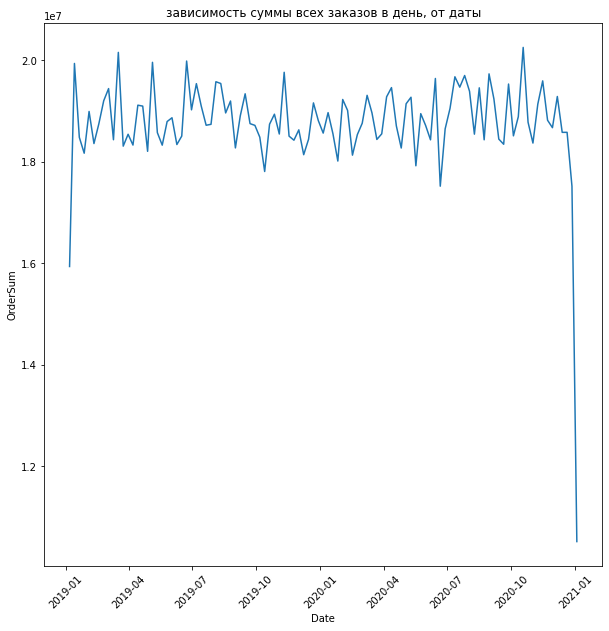

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.lineplot(data=df2,
             x='Date',
             y='OrderSum',).set(title='зависимость суммы всех заказов в день, от даты')
plt.xticks(rotation=45)

## Задание 3

In [ ]:
df = df.reset_index()

Text(0.5, 1.0, 'Сумма заказа в зависимости от года')

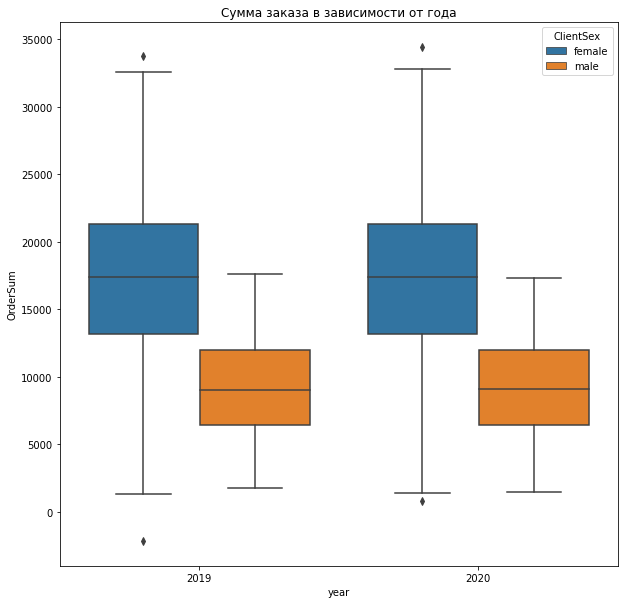

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(data=df.assign(year=df.Date.dt.year),x='year',y='OrderSum',
            hue='ClientSex').set_title('Сумма заказа в зависимости от года')

In [ ]:
df.assign(year=df.Date.dt.year)['year'].unique()

array([2020, 2019])

## Задание 4

<Axes: xlabel='OrderSum', ylabel='Count'>

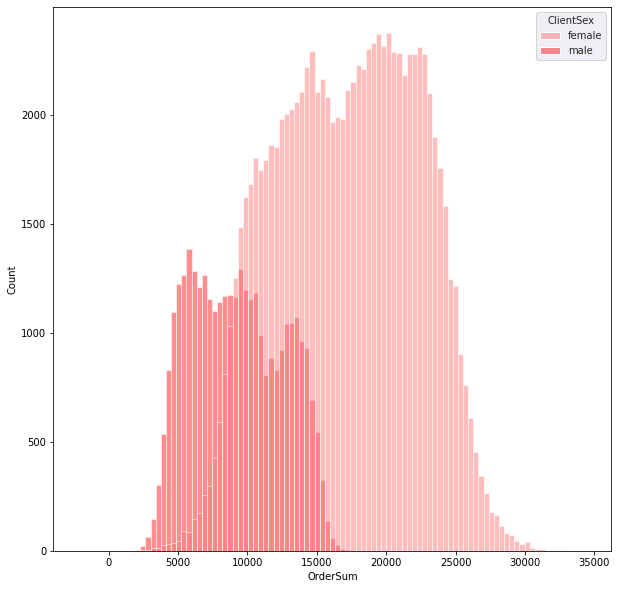

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.set_style('darkgrid')
sns.histplot(data=df, x='OrderSum', hue='ClientSex', palette=['#FF7F7F', '#FF1F1F'])

## Задание 5

In [ ]:
df5 = df.groupby(df['Date'].dt.month)['OrderSum'].max()

In [ ]:
df5 = df5.reset_index()
df5

,Date,OrderSum
0,1,34408.0
1,2,30473.0
2,3,31093.0
3,4,31577.0
4,5,30617.0
5,6,32176.0
6,7,33717.0
7,8,32756.0
8,9,32159.0
9,10,32587.0


<Axes: xlabel='Date', ylabel='OrderSum'>

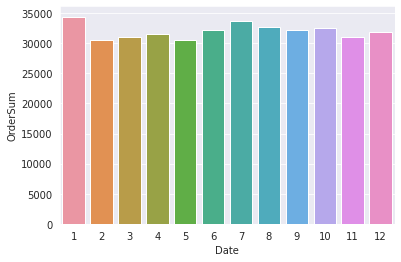

In [ ]:
sns.barplot(data=df5, x="Date", y='OrderSum')

In [ ]:
df5_dop = df.groupby([df['Date'].dt.month, 'ClientSex'])['OrderSum'].max()

In [ ]:
df5_dop = df5_dop.reset_index()
df5_dop

,Date,ClientSex,OrderSum
0,1,female,34408.0
1,1,male,16916.0
2,2,female,30473.0
3,2,male,16444.0
4,3,female,31093.0
5,3,male,16424.0
6,4,female,31577.0
7,4,male,17238.0
8,5,female,30617.0
9,5,male,17281.0


<Axes: xlabel='OrderSum', ylabel='Date'>

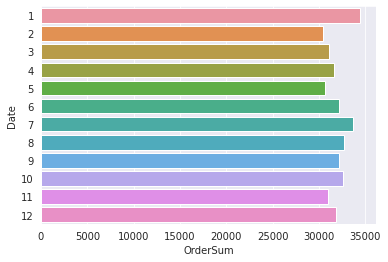

In [ ]:
sns.barplot(data=df5, x="OrderSum", y='Date', orient='h')

<Axes: xlabel='OrderSum', ylabel='Date'>

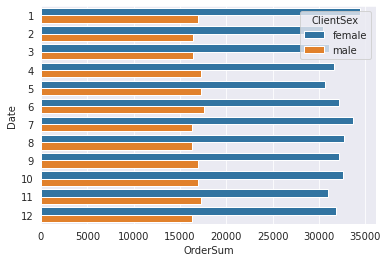

In [ ]:
sns.barplot(data=df5_dop, x="OrderSum", y='Date', orient='h', hue='ClientSex')

## Задание 6

In [ ]:
df6 = df.groupby([df.Date.dt.year, df.Date.dt.month, df.ClientSex])['OrderSum'].\
mean().reset_index(level=[1,2]).rename(columns={'Date':'Month'}).reset_index()

In [ ]:
df6

,Date,Month,ClientSex,OrderSum
0,2019,1,female,17240.805590
1,2019,1,male,9100.425459
2,2019,2,female,17129.668363
3,2019,2,male,9077.555891
4,2019,3,female,17154.861943
5,2019,3,male,9267.290935
6,2019,4,female,17248.557297
7,2019,4,male,9195.898142
8,2019,5,female,17198.297010
9,2019,5,male,9247.546138


<Axes: xlabel='ClientSex', ylabel='Date-Month'>

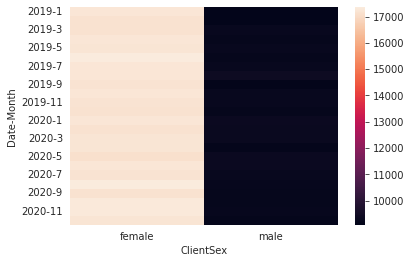

In [ ]:
sns.heatmap(pd.pivot_table(data=df6,index=['Date','Month'],columns=['ClientSex'],values='OrderSum'))

## Задание 7

In [ ]:
df7 = df.groupby(df.ClientSex)['OrderSum'].sum()
df7 = df7.reset_index()

In [ ]:
df7

,ClientSex,OrderSum
0,female,1.658300e+09
1,male,3.105627e+08


In [ ]:
data = df.sample(1000)

<Axes: xlabel='ClientSex', ylabel='OrderSum'>

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


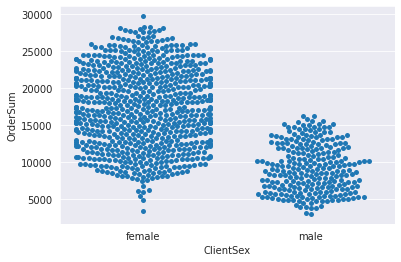

In [ ]:
sns.swarmplot(data=data, x='ClientSex', y='OrderSum')

<Axes: xlabel='ClientSex', ylabel='OrderSum'>

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 22.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


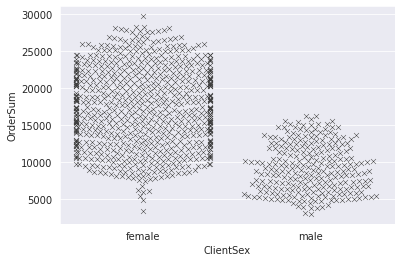

In [ ]:
sns.swarmplot(data=data, x='ClientSex', y='OrderSum', marker="x", linewidth=0.5)

## Задание 8

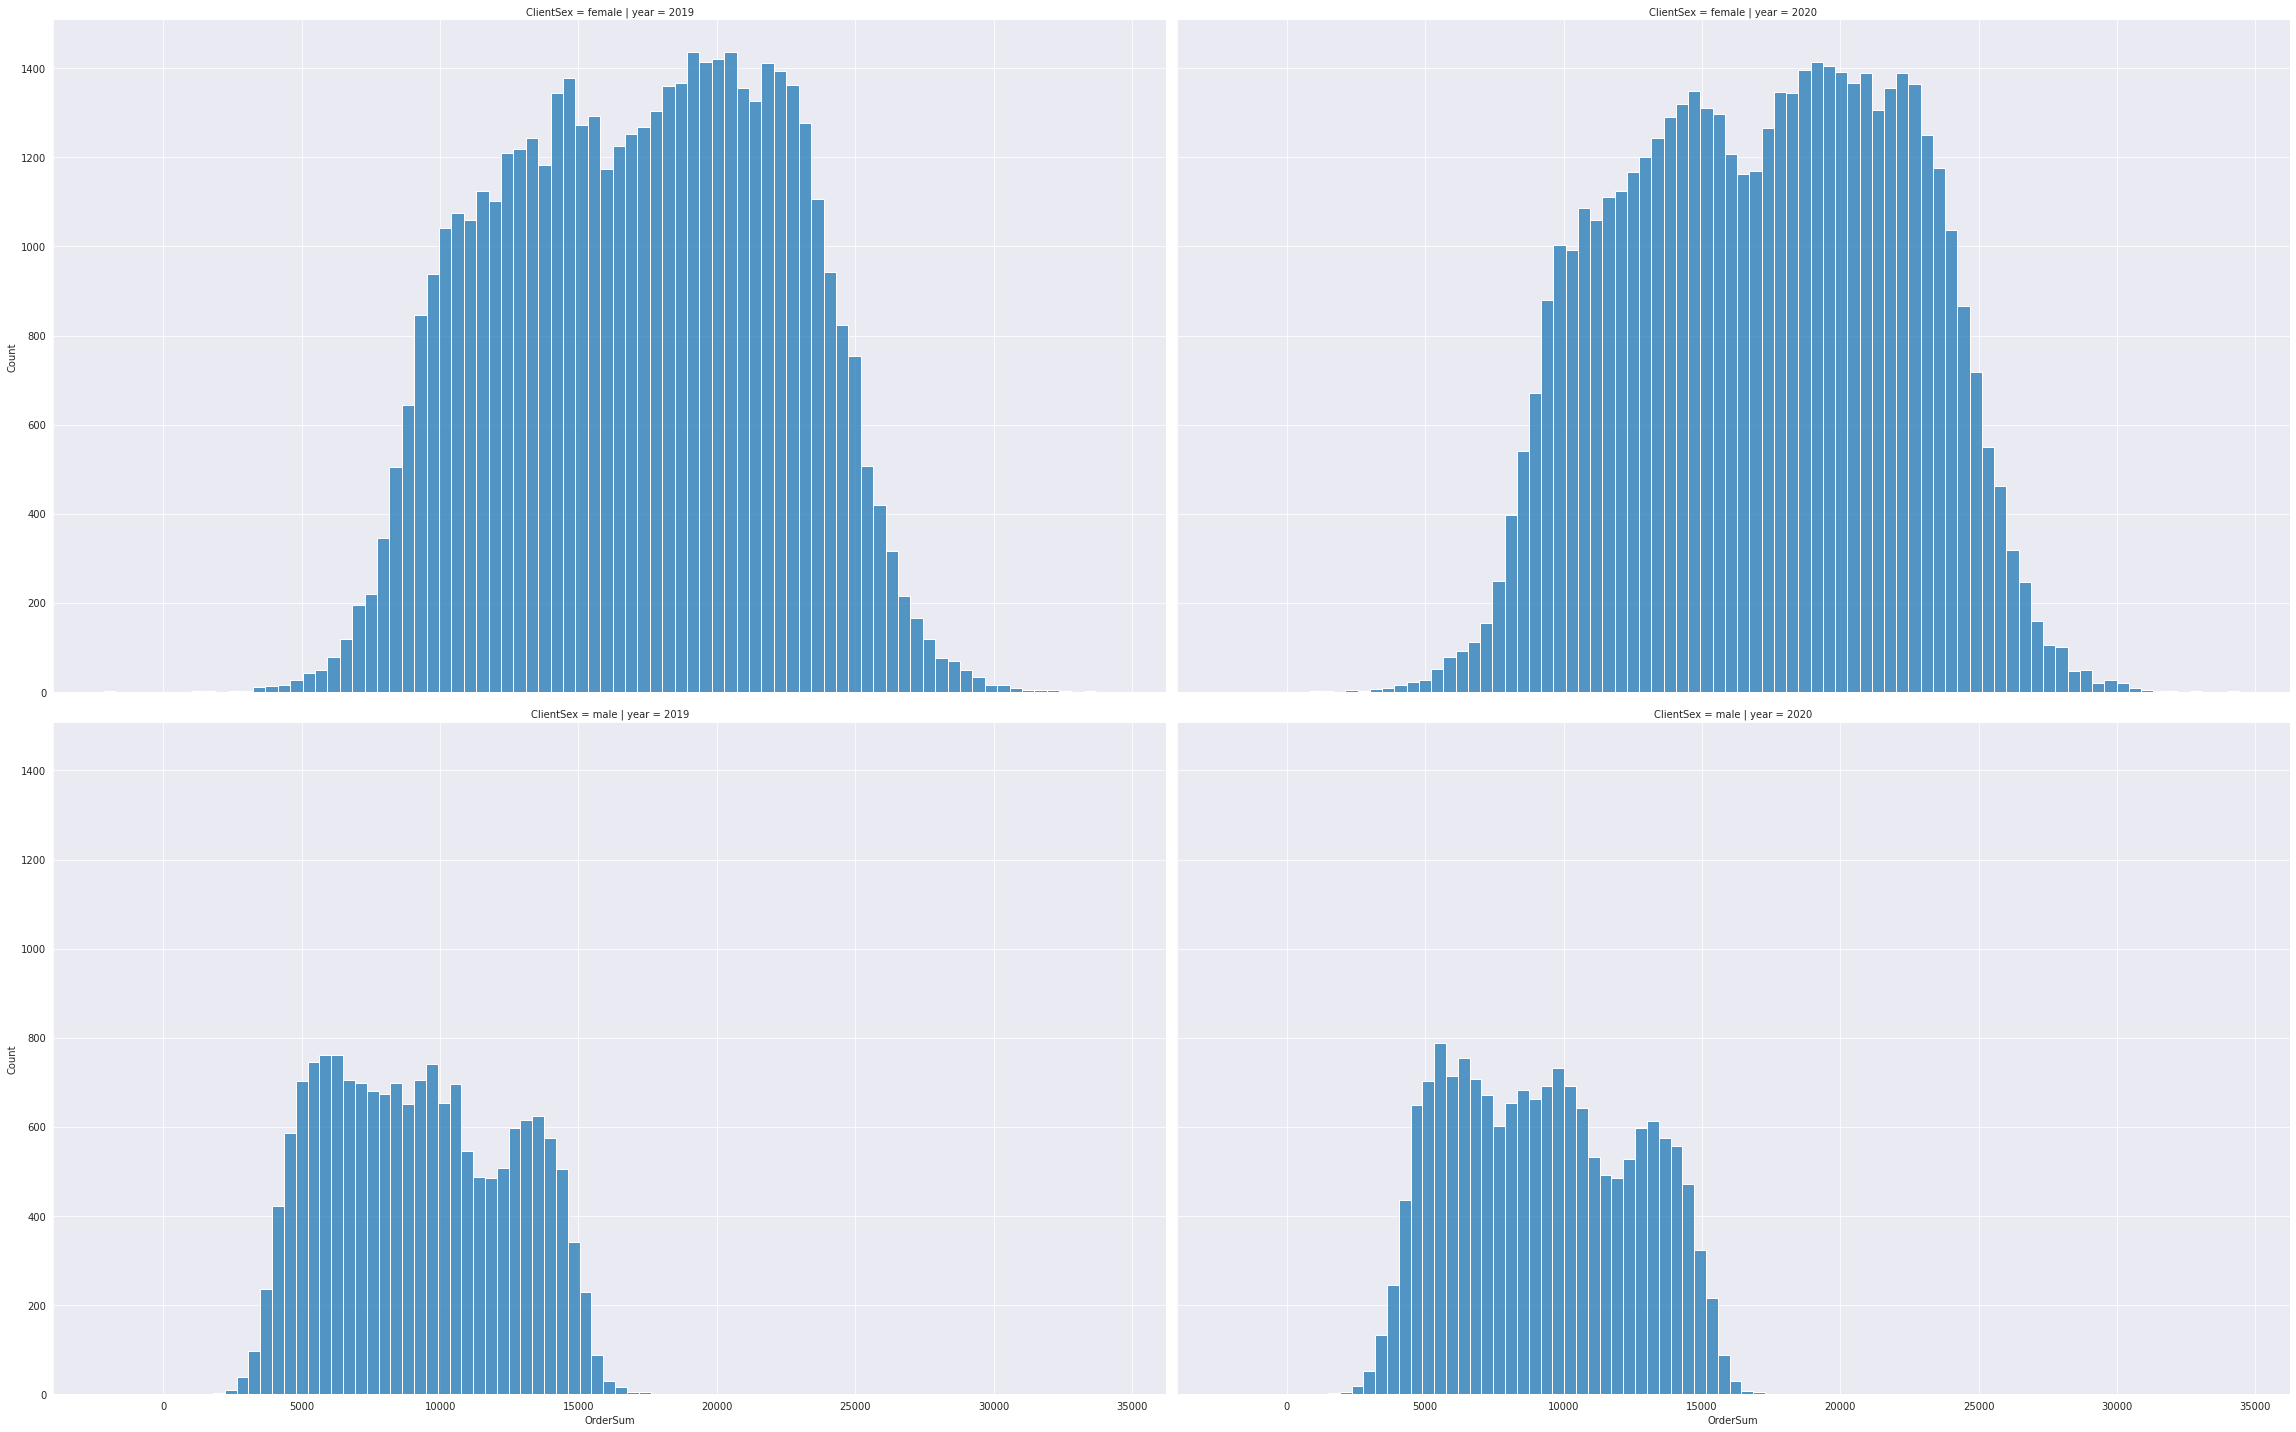

In [ ]:
g=sns.FacetGrid(data=df.assign(year=df.Date.dt.year),col='year',row='ClientSex',
                height=10, aspect=16/10)
g.map(sns.histplot,'OrderSum');

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


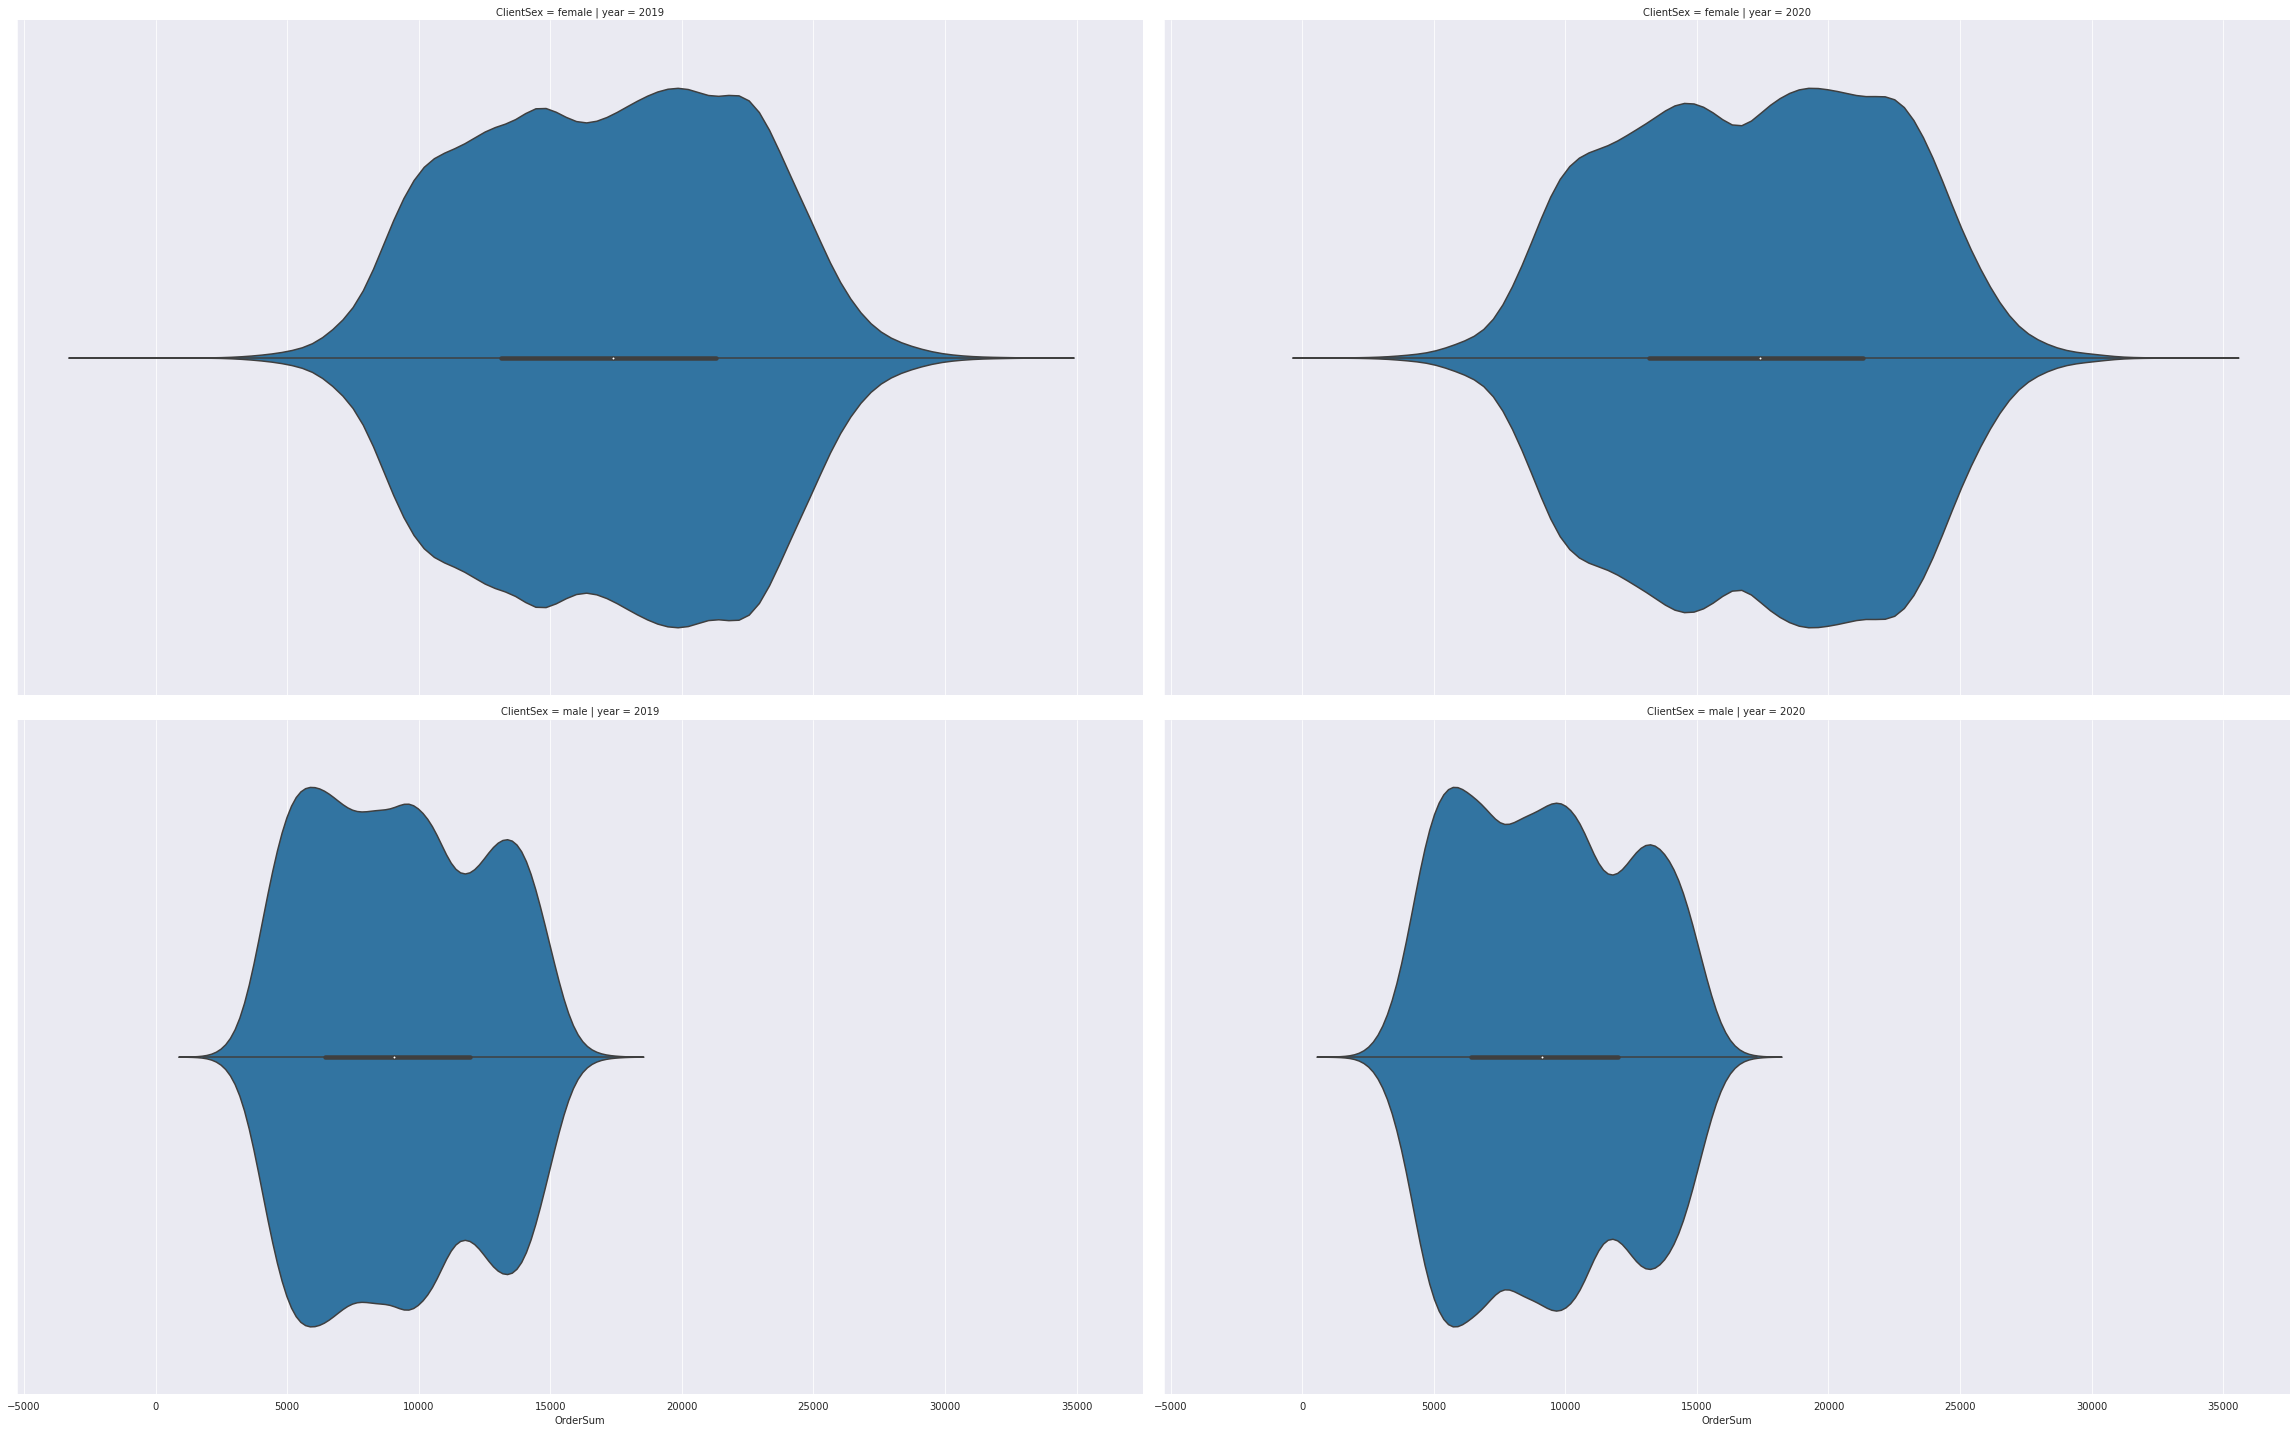

In [ ]:
g=sns.FacetGrid(data=df.assign(year=df.Date.dt.year),col='year',row='ClientSex',
                height=10, aspect=16/10)
g.map(sns.violinplot,'OrderSum');

## Задание 9

In [ ]:
df9 = df.groupby([df.Date, df.ClientSex])['OrderSum'].sum().reset_index()

In [ ]:
df9 = df9.set_index('Date')

In [ ]:
df9

,ClientSex,OrderSum
Date,,
2019-01-01,female,2452829.0
2019-01-01,male,537706.0
2019-01-02,female,2259811.0
2019-01-02,male,339176.0
2019-01-03,female,2038950.0
...,...,...
2020-12-29,male,311162.0
2020-12-30,female,2019029.0
2020-12-30,male,458752.0


In [ ]:
df9_pt = pd.pivot_table(data=df9, index='Date', columns=['ClientSex'], values='OrderSum')

In [ ]:
df9_pt

ClientSex,female,male
Date,,
2019-01-01,2452829.0,537706.0
2019-01-02,2259811.0,339176.0
2019-01-03,2038950.0,391244.0
2019-01-04,2523167.0,505018.0
2019-01-05,2034684.0,486221.0
...,...,...
2020-12-27,1808493.0,342910.0
2020-12-28,2203643.0,360199.0
2020-12-29,2399666.0,311162.0


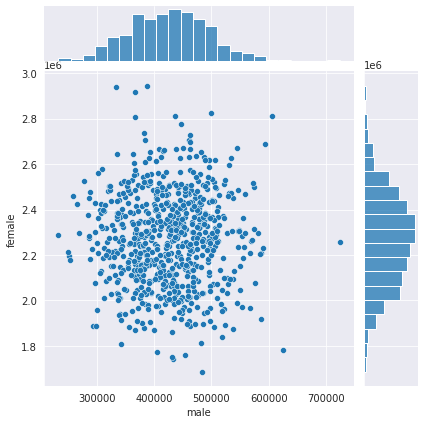

In [ ]:
sns.jointplot(data=df9_pt, x="male", y="female")

## Задание 10

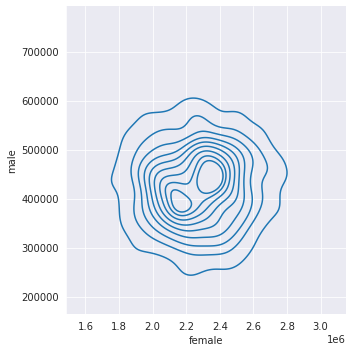

In [ ]:
sns.displot(data=df9_pt, x='female', y='male', kind='kde')

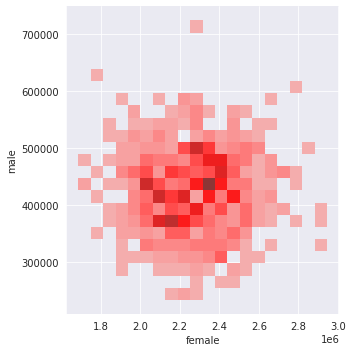

In [ ]:
colors = ['#FF7F7F', '#F08030', '#6890F0','#F8D030', '#F85888', '#705898', '#98D8D8']
sns.set_palette(sns.color_palette(colors))
sns.displot(data=df9_pt, x='female', y='male', kind='hist')